In [0]:
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 99% 741M/750M [00:11<00:00, 66.1MB/s]
100% 750M/750M [00:11<00:00, 68.6MB/s]


In [3]:
!unzip /content/stanford-dogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1357.jpg  
  inflating: images/Images/n02108089-boxer/n0210

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pathlib import Path
from keras.preprocessing import image
import glob
import cv2
import pickle
from scipy.io import loadmat

In [0]:
path1 = '/content/annotations/Annotation'
path2 = '/content/images/Images'
breed = []
for folder in os.listdir(path2):
  breed.append(folder)

In [110]:
len(breed)

120

In [111]:
breed[0]

'n02116738-African_hunting_dog'

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import xml.etree.ElementTree as ET
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [0]:
path1 = '/content/data'
images = []
label = []
for folder in os.listdir(path1):
  for f in os.listdir(path1+'/'+folder):
      name = f.split('.')[0]
      img = image.load_img(path1+'/'+folder+'/'+f,target_size=(224,224))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = preprocess_input(img)
      images.append(img)
      label.append(name)

In [20]:
image.shape,labels.shape

((20580, 224, 224, 3), (20580,))

In [112]:
breed = np.array(breed)
breed.shape

(120,)

In [113]:
breed = le.fit_transform(breed)
breed

array([119,  31,  49, 105, 101,  24,  27,  79,  69,  78,  28,  45,  37,
        22,  51,  15,  86,  71,  74,   8, 104,  85,  30, 106,  39,   0,
       108,  68, 111,  10,   6,  40,  29,  84, 102,  92, 109,  26,  93,
        52,   3,  98,  23,  44,   9,  88,  94,  63,   4,  21,  58,  67,
        35,  57,  43,  33,  41, 103,  11,  53,  64,  59,  36, 117,  70,
        96,  95,  50,  89,  18, 114,  90,  38,  17, 107,   1,  77,   2,
        56, 115, 110,  46,  97,  87,  62,  83,  47,  66,  65,  48,  34,
        76,  13,   7,  75, 118, 100,  80,  12,  73,  16,  99,  91,  81,
        19,  72,  42,  60,  25,  32,  82, 112, 116,  54,  14, 113,   5,
        61,  20,  55])

In [114]:
breed = np.reshape(breed,[120,1])
breed.shape
breed = ohe.fit_transform(breed)
breed.shape

(120, 120)

In [116]:
breed[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1.])

In [1]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [23]:
labels.shape

(20580, 120)

In [0]:
X_train = image
Y_train = labels

In [0]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")

In [0]:
import shutil
for c in breed:
    p = os.path.join("val_images",c) #val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)
      
SPLIT = 0.85
for f in os.listdir("./data"):
    path = "data/"+f
    imgs = os.listdir(path)
    
    split_size = int(SPLIT*len(imgs))
    files_to_move = imgs[split_size:]
    #print(len(files_to_move))
    #print(files_to_move)
    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [35]:

train_gen = ImageDataGenerator(rescale=1.0/255)


val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "data/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_gen.flow_from_directory(
    "val_images/",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 17439 images belonging to 120 classes.
Found 3141 images belonging to 120 classes.


In [63]:
from keras.preprocessing import image
import numpy as np
from keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87916544/87910968 [==============================] - 4s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_442 (Activation)     (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
______________________

In [65]:
from keras.layers import * 
from keras.models import Model
av1 = GlobalAveragePooling2D()(pre_trained_model.output)
d1 = Dropout(0.2)(av1)
fc2 = Dense(120,activation='softmax')(d1)

model = Model(inputs=pre_trained_model.input,output=fc2)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_442 (Activation)     (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [0]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [68]:
history = model.fit_generator(train_generator,epochs = 30,validation_data = val_generator,)

Epoch 1/30
545/545 [==============================] - 71s 131ms/step - loss: 2.1782 - accuracy: 0.4910 - val_loss: 0.3218 - val_accuracy: 0.8201
Epoch 2/30
545/545 [==============================] - 63s 115ms/step - loss: 1.3130 - accuracy: 0.6485 - val_loss: 0.0018 - val_accuracy: 0.8249
Epoch 3/30
545/545 [==============================] - 63s 115ms/step - loss: 1.1165 - accuracy: 0.6910 - val_loss: 2.1150 - val_accuracy: 0.8281
Epoch 4/30
545/545 [==============================] - 63s 115ms/step - loss: 1.0076 - accuracy: 0.7144 - val_loss: 0.0011 - val_accuracy: 0.8389
Epoch 5/30
545/545 [==============================] - 63s 116ms/step - loss: 0.9312 - accuracy: 0.7324 - val_loss: 0.3013 - val_accuracy: 0.8246
Epoch 6/30
545/545 [==============================] - 63s 115ms/step - loss: 0.8427 - accuracy: 0.7513 - val_loss: 0.0017 - val_accuracy: 0.8329
Epoch 7/30
545/545 [==============================] - 63s 115ms/step - loss: 0.8196 - accuracy: 0.7575 - val_loss: 0.5911 - val_ac

In [0]:
path1 = '/content/drive/My Drive/test'
images = []
for folder in os.listdir(path1):

  img = image.load_img(path1+'/'+folder,target_size=(224,224))
  img = image.img_to_array(img)
  img = img/255.0
  images.append(img)


In [161]:
images = np.array(images)
images.shape

(38, 224, 224, 3)

Eskimo_dog


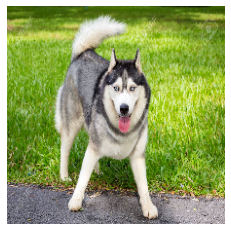

Rhodesian_ridgeback


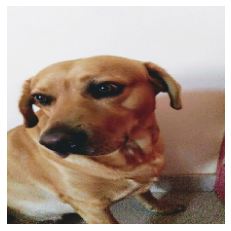

boxer


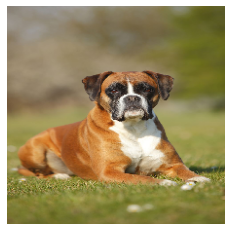

Chihuahua


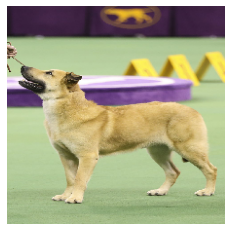

Doberman


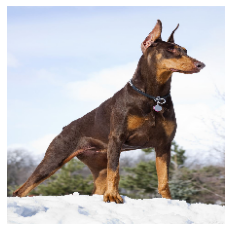

pug


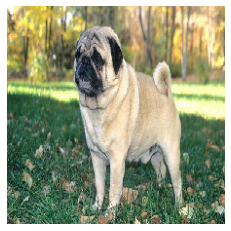

Chihuahua


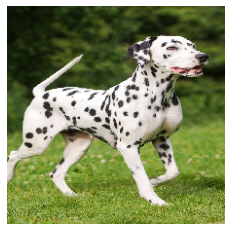

Airedale


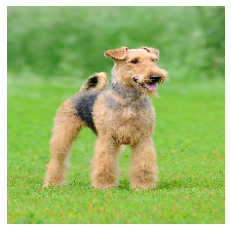

Border_collie


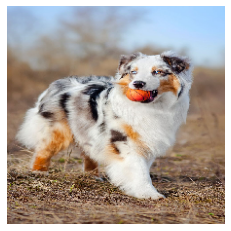

malamute


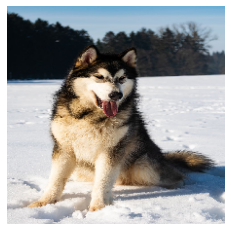

Afghan_hound


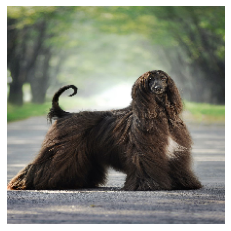

Chihuahua


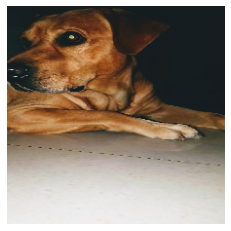

Appenzeller


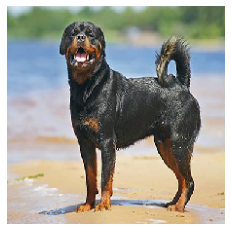

EntleBucher


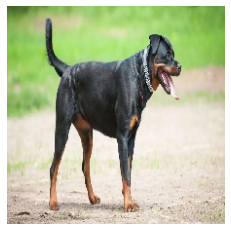

Labrador_retriever


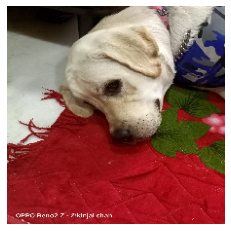

German_shepherd


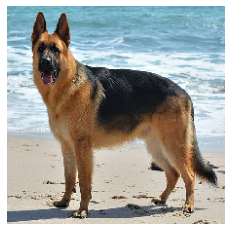

German_shepherd


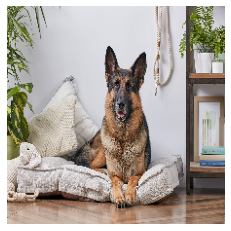

German_shepherd


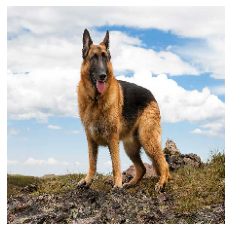

golden_retriever


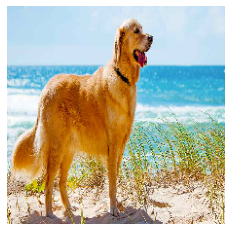

golden_retriever


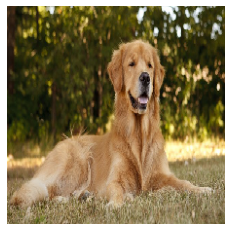

American_Staffordshire_terrier


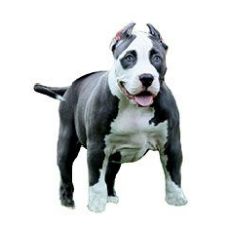

Welsh_springer_spaniel


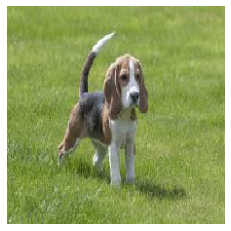

Brabancon_griffon


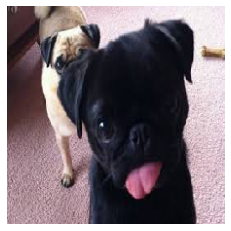

pug


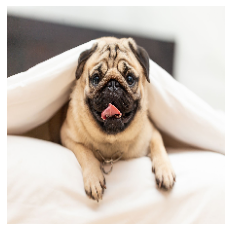

Bernese_mountain_dog


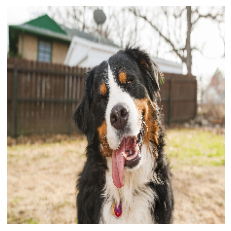

American_Staffordshire_terrier


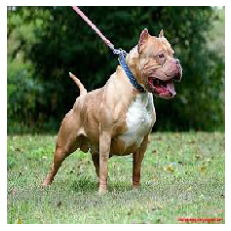

Eskimo_dog


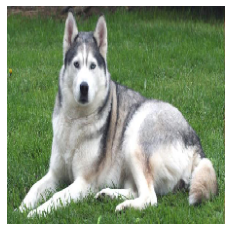

Labrador_retriever


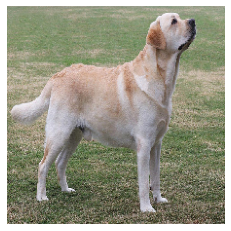

flat-coated_retriever


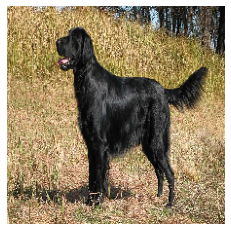

Eskimo_dog


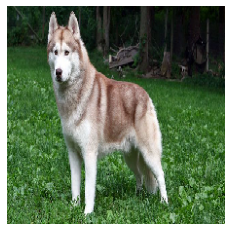

American_Staffordshire_terrier


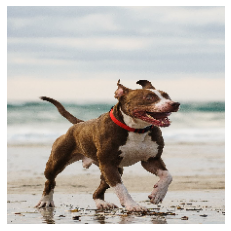

standard_poodle


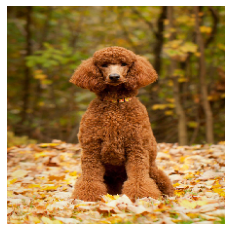

Rottweiler


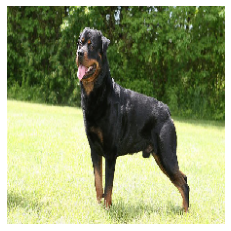

English_setter


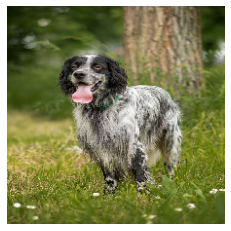

Eskimo_dog


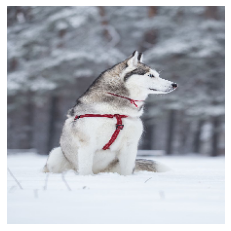

pug


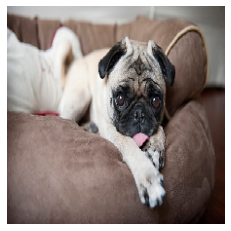

Rottweiler


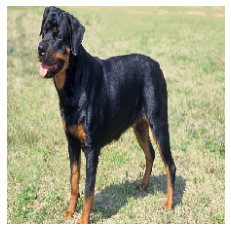

Eskimo_dog


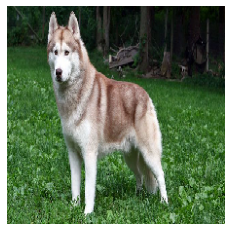

In [163]:
p = model.predict(images)

for i,pics in enumerate(p):
  pics = pics.reshape([120,1])
  pics = [1 if x>0.5 else 0 for x in pics]
  pics = np.reshape(pics,[1,120])
  pics = ohe.inverse_transform(pics)
  pics = le.inverse_transform(pics.reshape([1,]))
  print(pics[0][10:])
  plt.imshow(images[i])
  plt.axis("off")
  plt.show()


In [0]:
from keras.models import *
model.save('model_'+str(1)+'.h5')